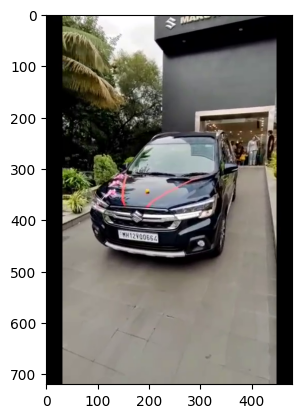

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [1]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import numpy as np 
import os 
import pandas as pd 
import IPython.display as ipd
import pytesseract

# Load the pre-trained Haar cascade for Russian license plates
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

video_capture = cv2.VideoCapture('car3.mp4')

text_detection_img = None  # The image used to read the number plate

if not video_capture.isOpened():
    print("Error: Could not open video capture.")
else:
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("End of video.")
            break

        # Apply Gaussian blur to reduce noise
        blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)

        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2GRAY)

        # Detect license plates in the frame
        plates = plate_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Check if license plate(s) are detected
        if len(plates) > 0:
            text_detection_img = frame

            # Display the original frame using matplotlib
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.show()

            # Stop processing after identifying one frame
            break

    video_capture.release()
    

if text_detection_img is not None:
    # Display the image using matplotlib
    cv2.imshow(cv2.cvtColor(text_detection_img, cv2.COLOR_BGR2RGB))
    cv2.show()

    # Now you can run your number plate reading and object detection scripts on text_detection_img


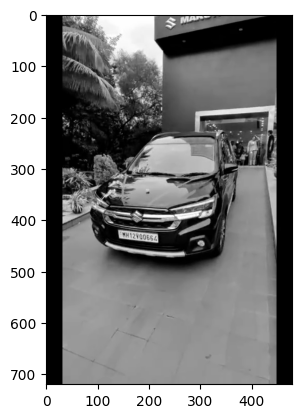

In [27]:
img = text_detection_img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

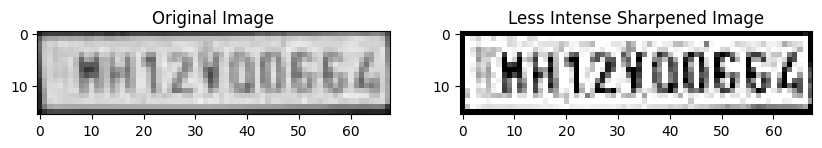

In [28]:
less_intense_sharpening_kernel = np.array([[0, -1, 0],
                                           [-1,  5, -1],
                                           [0, -1, 0]])

# Apply the less intense sharpening kernel to the image
sharpened_img = cv2.filter2D(cropped_img, -1, less_intense_sharpening_kernel)

# Display the original and less intense sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Less Intense Sharpened Image')

plt.show()

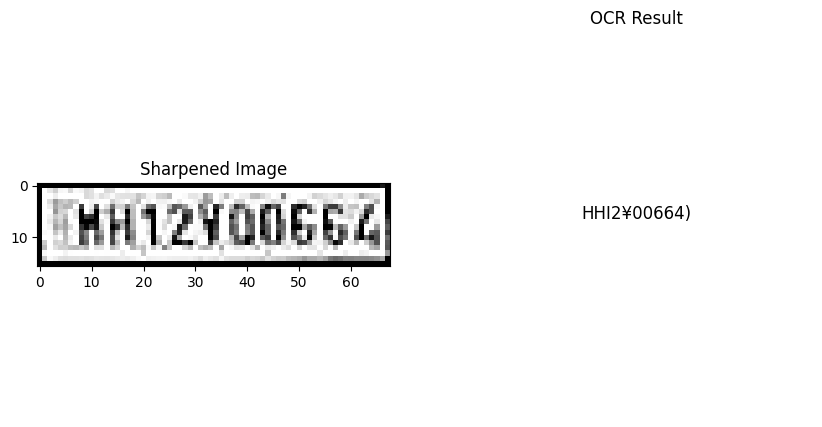

In [30]:
custom_config = r'--oem 3 --psm 6 '  # Adjust OCR Engine Mode (oem) and Page Segmentation Mode (psm) as needed
text_from_image = pytesseract.image_to_string(sharpened_img, config=custom_config)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')

plt.subplot(1, 2, 2)
plt.axis('off')  # Turn off axis for the OCR result
plt.text(0.5, 0.5, text_from_image, fontsize=12, ha='center', va='center')
plt.title('OCR Result')

plt.show()

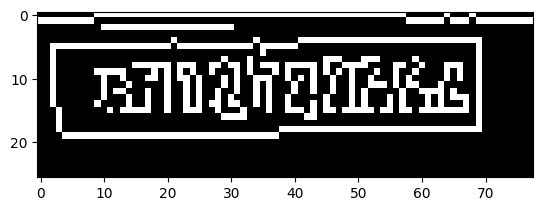

In [3]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx)==4:
        location = approx
        break

In [1]:
location

NameError: name 'location' is not defined

In [2]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

NameError: name 'np' is not defined

In [3]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [9]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

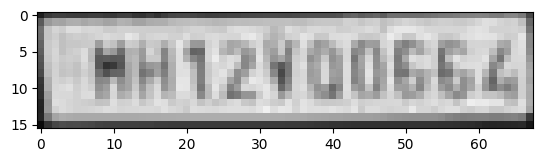

In [10]:
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

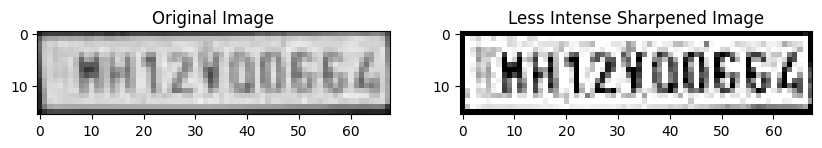

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(sharpened_img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 3], [68, 3], [68, 16], [3, 16]], '4h124Q4gG 4', 0.05496233933092575)]